In [146]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import os

In [147]:
#Import true Data
stri="GA-03"
#C:\Users\ameya\OneDrive - University of Pittsburgh\Eclipse\TestingData\NewShiftedFiles
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/TestingData/NewShiftedFiles/"+stri +".txt"
#directory="C:/Users/asv26/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
Data3=np.loadtxt(directory,delimiter=",")
Data3=Data3.T
Data3[0]=Data3[0]/2

#index=2
#newVData3=Data3[0][index:-1]
#newTData3=Data3[1][index:-1]-Data3[1][index]
#newData3=np.array([newVData3.T,newTData3.T])
newData3=Data3
print(newData3)

fsData3=1/np.mean(np.diff(newData3[1]))
print(fsData3)

[[1.11540958e+00 2.51155898e+00 2.51155898e+00 ... 1.82254880e+00
  1.82255149e+00 1.82253862e+00]
 [3.53716743e+01 3.53740313e+01 3.53763934e+01 ... 4.38264591e+03
  4.38264826e+03 4.38265063e+03]]
425.20712772478714


In [148]:
#Import true Data
stri="GA-04"
#C:\Users\ameya\OneDrive - University of Pittsburgh\Eclipse\TestingData\NewShiftedFiles
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/TestingData/NewShiftedFiles/"+stri +".txt"
#directory="C:/Users/asv26/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
Data4=np.loadtxt(directory,delimiter=",")
Data4=Data4.T
Data4[0]=Data4[0]/2

#index=2
#newVData4=Data4[0][index:-1]
#newTData4=Data4[1][index:-1]-Data4[1][index]
#newData4=np.array([newVData4.T,newTData4.T])
newData4=Data4
print(newData4)

fsData4=1/np.mean(np.diff(newData4[1]))
print(fsData4)

[[-4.63575450e-01  1.36967276e+00  1.36929730e+00 ...  1.12841766e+00
   1.12838952e+00  1.12838503e+00]
 [ 4.79615923e+01  4.79639424e+01  4.79663295e+01 ...  4.38751032e+03
   4.38751267e+03  4.38751502e+03]]
425.11793691070045


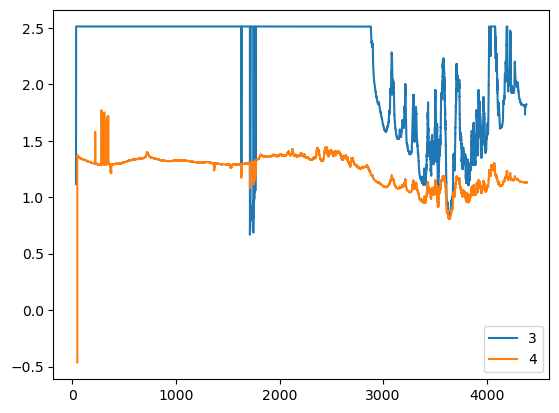

In [149]:
plt.plot(newData3[1],newData3[0],label="3")
plt.plot(newData4[1],newData4[0],label="4")
plt.legend()
plt.show()


In [150]:
def quickInterpolate(x,t,st):
    result=np.array([])
    for i in st:
        begin=np.where(t<i)[0][-1]
        last=np.where(t>i)[0][0]
        result=np.append(result,(x[last]+x[begin])/2)
    return np.array([result,st])

st=np.linspace(2800,4300,1000)
iGA3=quickInterpolate(newData3[0],newData3[1],st)
iGA4=quickInterpolate(newData4[0],newData4[1],st)


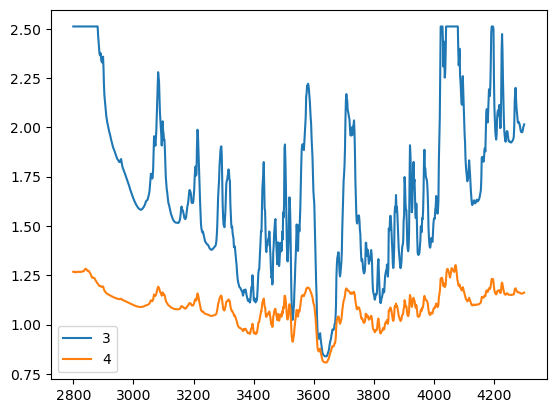

In [151]:
#plt.plot(iGA0[1],iGA0[0])
#plt.plot(iData[1],iData[0])
plt.plot(st,iGA3[0],label="3")
plt.plot(st,iGA4[0],label="4")
plt.legend()
#plt.ylim(1.05,1.1)

In [399]:
Vt=0.025
def transformLogToLin(x,a,b,c): #takes log to linear
    val=np.clip(b*np.exp(a*x)+c,0,2.5)
    return val
def linLogTransform(x,a,b,c,d,e): #linear below e, log above e. d slope of linear
    if(x<e):
        return d*x
    else:
        return np.clip(b*np.exp(a*x)+c,0,2.5)
def dankoModel(Vlog,Ismag,Rlog,Rlin,n):
    Is=Ismag
    i=(-Is*Rlog+np.exp(Vlog/(n*Vt))*Is*Rlog+Vlog)/Rlog #Current through photodiode in log circuit
    return np.clip(i*Rlin,0,2.5)

linLogTransform=np.vectorize(linLogTransform)

#params,stats=scipy.optimize.curve_fit(transformLogToLin,iGA4[0],iGA3[0],p0=[1,1,0])
#params,stats=scipy.optimize.curve_fit(linLogTransform,iGA4[0],iGA3[0],p0=[5.6,2e-3,0.6,1.1,0.9])
params,stats=scipy.optimize.curve_fit(dankoModel,iGA4[0],iGA3[0],p0=[4e-10,20e3,21e3,4])

print(params)
print(stats)
#test = np.linspace(0,5,100)
#plt.plot(test,transformLogToLin(test,*params))

[2.99601332e-09 4.97384270e+04 4.80933078e+04 5.31615363e+00]
[[ 5.20930217e-09 -8.64824327e+04 -8.36219893e+04 -8.00528811e-08]
 [-8.64824327e+04  1.43574147e+18  1.38825371e+18  1.32913197e+06]
 [-8.36219893e+04  1.38825371e+18  1.34233662e+18  1.28516327e+06]
 [-8.00537304e-08  1.32914613e+06  1.28517691e+06  1.40156327e-03]]


In [400]:
#transformediGA4=transformLogToLin(iGA4[0],*params)
#transformediGA4=linLogTransform(iGA4[0],*[5.65,1.87e-03,6.9e-01,1.1,1])
#transformediGA4=linLogTransform(iGA4[0],*params)
transformediGA4=dankoModel(iGA4[0],*params)
#transformediGA4=dankoModel(iGA4[0],*[4e-10,20e03,21e+03,4])


loglinoff=100*(transformediGA4-iGA3[0])/iGA3[0]

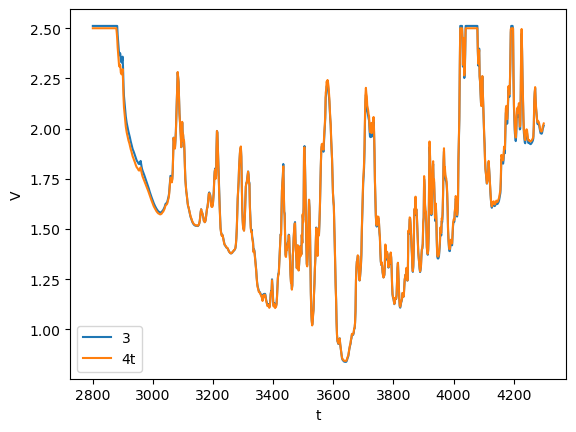

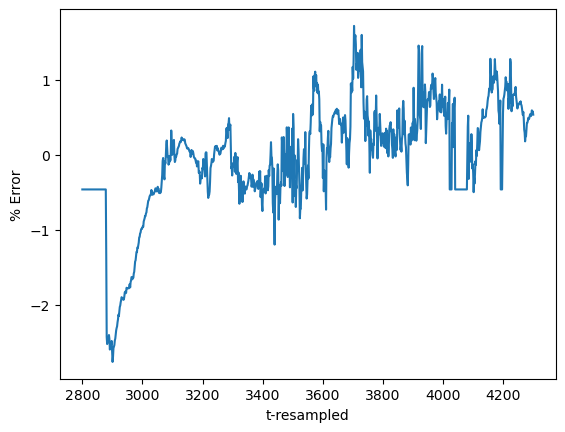

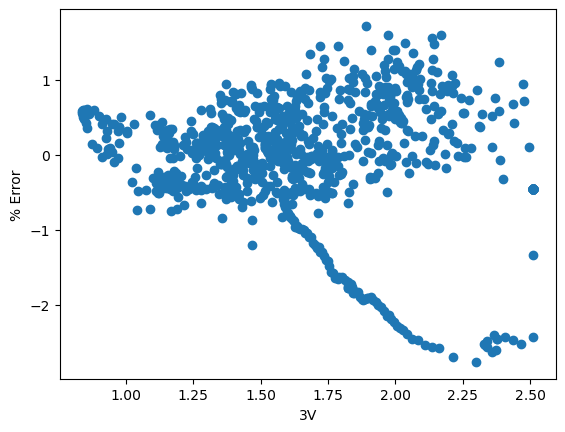

In [401]:
plt.plot(st,iGA3[0],label="3")
plt.plot(st,transformediGA4,label="4t")
plt.xlabel("t")
plt.ylabel("V")
plt.legend()
plt.show()
plt.plot(st,loglinoff)
plt.xlabel("t-resampled")
plt.ylabel("% Error")
plt.show()
plt.scatter(iGA3[0],loglinoff)
plt.xlabel("3V")
plt.ylabel("% Error")
plt.show()

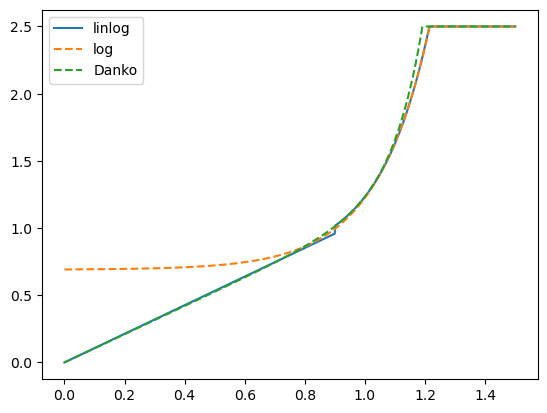

In [382]:
Vin=np.linspace(0,1.5,1000)
plt.plot(Vin,linLogTransform(Vin,*[6.07134717e+00,1.09638691e-03,7.58102626e-01,1.06548718e+00, 9.00000000e-01]),label="linlog")
plt.plot(Vin,transformLogToLin(Vin,*[5.65508249e+00,1.87411287e-03,6.90348485e-01]),label="log",linestyle="dashed")
plt.plot(Vin,dankoModel(Vin,*[4e-10,20e03,21e+03,4]),label="Danko",linestyle="dashed")

plt.legend()

In [284]:
#transformedGA4=transformLogToLin(newData4[0],*params)
transformedGA4=linLogTransform(newData4[0],*params)

6.071347171053478 0.001096386906149704 0.7581026261709587 1.0654871821255851 0.9


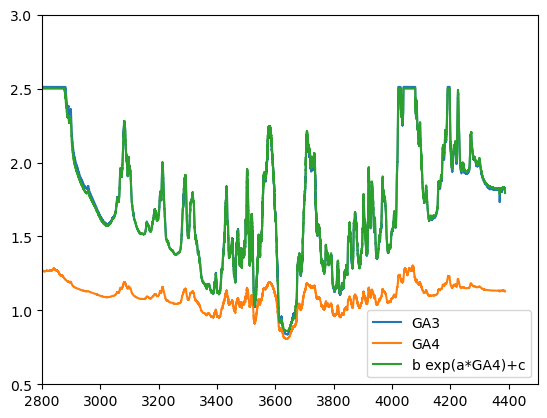

In [285]:
print(*params)
plt.plot(newData3[1],newData3[0],label="GA3")
plt.plot(newData4[1],newData4[0],label="GA4")
plt.plot(newData4[1],transformedGA4,label="b exp(a*GA4)+c")
plt.ylim(0.5,3)
plt.xlim(2800,4500)
plt.legend()
plt.show()